## IMPORT LIBRARIES

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

## EXTRACT DATASET FROM CSV

In [2]:
df = pd.read_csv("coin_BinanceCoin.csv")

In [3]:
print("First rows")
print(df.head())

First rows
   SNo          Name Symbol                 Date      High       Low  \
0    1  Binance Coin    BNB  2017-07-26 23:59:59  0.109013  0.099266   
1    2  Binance Coin    BNB  2017-07-27 23:59:59  0.108479  0.100888   
2    3  Binance Coin    BNB  2017-07-28 23:59:59  0.109019  0.101473   
3    4  Binance Coin    BNB  2017-07-29 23:59:59  0.111264  0.101108   
4    5  Binance Coin    BNB  2017-07-30 23:59:59  0.108138  0.103162   

       Open     Close    Volume   Marketcap  
0  0.105893  0.105138  200395.0  10513800.0  
1  0.105108  0.107737  344499.0  10773700.0  
2  0.107632  0.104067  342568.0  10406700.0  
3  0.104782  0.107811  340218.0  10781100.0  
4  0.107935  0.106414  224261.0  10641400.0  


In [5]:
print("Data Information")
df.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1442 non-null   int64  
 1   Name       1442 non-null   object 
 2   Symbol     1442 non-null   object 
 3   Date       1442 non-null   object 
 4   High       1442 non-null   float64
 5   Low        1442 non-null   float64
 6   Open       1442 non-null   float64
 7   Close      1442 non-null   float64
 8   Volume     1442 non-null   float64
 9   Marketcap  1442 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 112.8+ KB


In [6]:
print("\n Shape (rows, columns) :", df.shape)


 Shape (rows, columns) : (1442, 10)


## TRANSFORM DATA

In [9]:
duplicates = df.duplicated().sum()
print("\n Number of duplicate rows: ", duplicates)


 Number of duplicate rows:  0


In [11]:
print("\n Missing values per columns :", df.isna().sum())


 Missing values per columns : SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df = df.drop(columns= ['SNo', 'Name', 'Symbol'], errors='ignore')

In [16]:
num_cols = ['Open','High','Low','Close','Volume','Marketcap']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [17]:
df[num_cols] = df[num_cols].fillna(method='ffill')
df[num_cols] = df[num_cols].fillna(method='bfill')

/var/folders/t8/cvxqp8z14gndpvjgd_wg464w0000gn/T/ipykernel_20371/3072939528.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[num_cols] = df[num_cols].fillna(method='ffill')
/var/folders/t8/cvxqp8z14gndpvjgd_wg464w0000gn/T/ipykernel_20371/3072939528.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[num_cols] = df[num_cols].fillna(method='bfill')


## LOAD DATA

In [18]:
df = df.sort_values('Date')

In [24]:
print("Summary Statistics :")
num_cols = ['Open','High','Low','Close','Volume','Marketcap']
print(df[num_cols].describe())

Summary Statistics :
              Open         High          Low        Close        Volume  \
count  1442.000000  1442.000000  1442.000000  1442.000000  1.442000e+03   
mean     52.028231    54.764100    49.165813    52.250308  6.269804e+08   
std     115.170060   121.675817   108.118454   115.390917  1.479775e+09   
min       0.099721     0.101211     0.096109     0.099867  9.284190e+03   
25%      10.037860    10.390750     9.677340    10.068350  5.089148e+07   
50%      16.210328    16.592114    15.727250    16.210569  1.981830e+08   
75%      27.669888    28.240910    26.963038    27.691107  3.942378e+08   
max     676.315905   690.931965   631.465298   675.684077  1.798295e+10   

          Marketcap  
count  1.442000e+03  
mean   7.835575e+09  
std    1.780041e+10  
min    9.986680e+06  
25%    1.157863e+09  
50%    2.451099e+09  
75%    4.061743e+09  
max    1.036722e+11  


## EDA(EXPLORATORY DATA ANALYSIS)

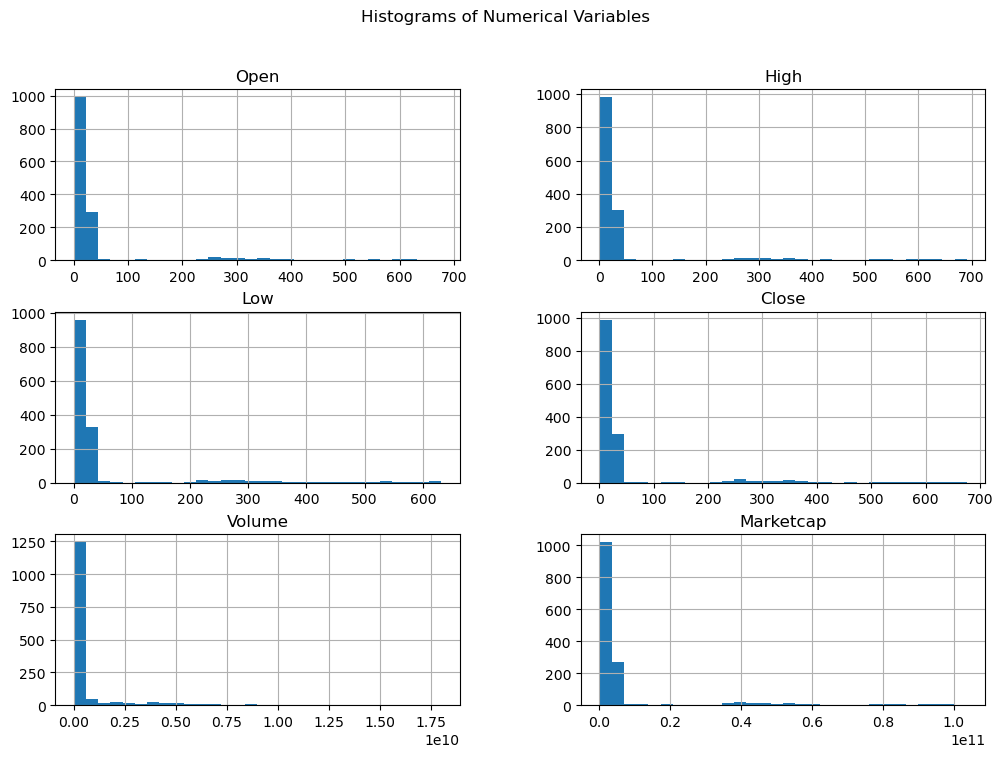

In [28]:
df[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

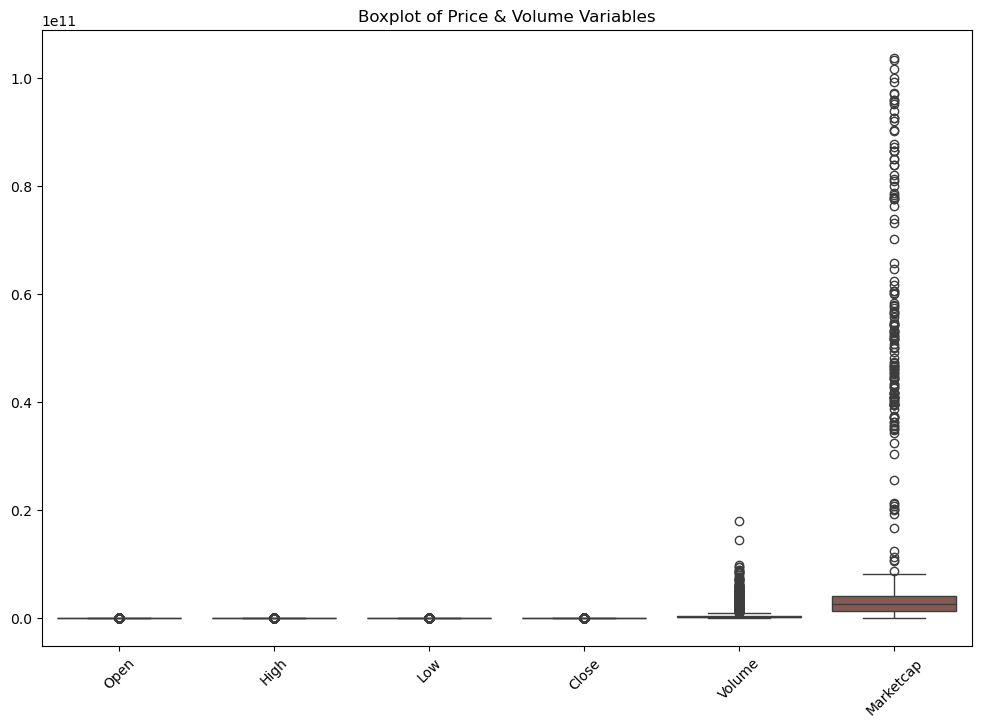

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Price & Volume Variables")
plt.xticks(rotation=45)
plt.show()

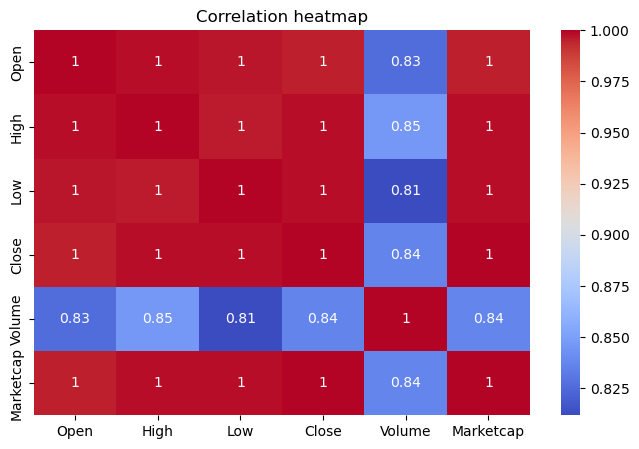

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

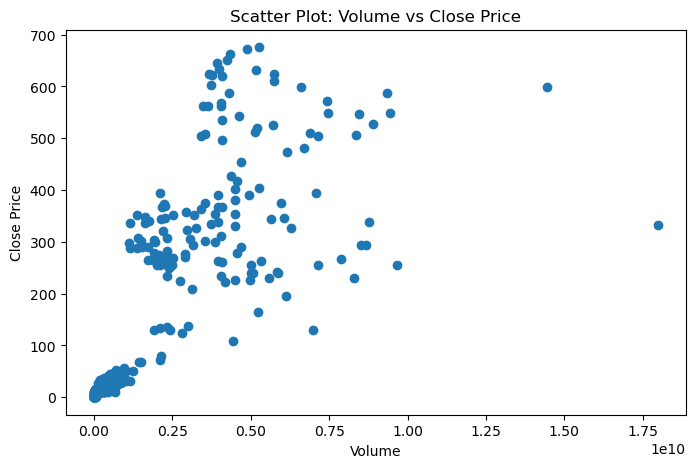

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df['Volume'], df['Close'])
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.title("Scatter Plot: Volume vs Close Price")
plt.show()

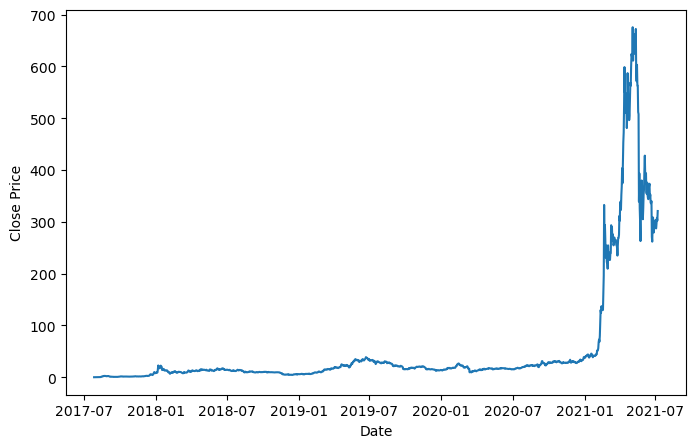

In [33]:
plt.figure(figsize=(8,5))
plt.plot(df['Date'], df['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

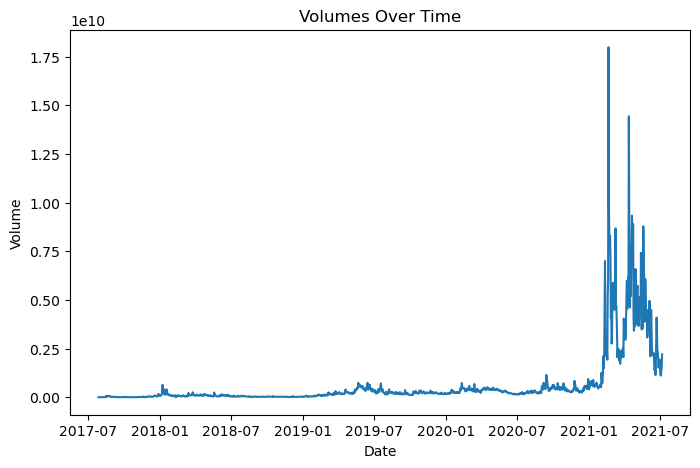

In [35]:
plt.figure(figsize=(8,5))
plt.plot(df['Date'], df['Volume'])
plt.title("Volumes Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [37]:
fig = go.Figure(data=[
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']
    )
])

In [39]:
fig.update_layout(
    title="Binance Coin Price Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    template="plotly_dark"

)
fig.show()

## MACHINE LEARING PROBLEM : ANOMALY DETECTION

In [40]:
# Relevant columns
df = df[["Date", "Open", "Close", "Volume", "High", "Low"]]

In [41]:
# Creation of features to solve the problem
df["return"] = df["Close"].pct_change()
df["vol_20"] = df["return"].rolling(20).std()
df["range"] = (df["High"] - df["Low"] / df["Open"])
df["vol_change"] = df["Volume"].pct_change()
df = df.dropna()
print(df.head())

                  Date     Open    Close      Volume     High       Low  \
20 2017-08-15 23:59:59  1.32709  1.05655  19824400.0  1.37892  0.923372   
21 2017-08-16 23:59:59  1.11969  1.43724  31363100.0  1.45272  1.078690   
22 2017-08-17 23:59:59  1.43697  1.96715  61296500.0  2.11131  1.323640   
23 2017-08-18 23:59:59  1.92519  2.38400  69048000.0  2.75412  1.894700   
24 2017-08-19 23:59:59  2.33440  2.09337  43391300.0  2.33440  1.819940   

      return    vol_20     range  vol_change  
20 -0.184490  0.263781  0.683133   -0.616535  
21  0.360314  0.266307  0.489337    0.582045  
22  0.368700  0.265848  1.190177    0.954415  
23  0.211906  0.263623  1.769957    0.126459  
24 -0.121909  0.269148  1.554782   -0.371578  


In [42]:
anomaly_features = ['return', 'vol_20', 'range', 'vol_change']
X_anomaly = df[anomaly_features].copy()

In [44]:
scaler_anomaly = StandardScaler()
X_anomaly_scaled = scaler_anomaly.fit_transform(X_anomaly)

In [48]:
ANOMALY_CONTAMINATION = 0.02
iso = IsolationForest(n_estimators=200, contamination=ANOMALY_CONTAMINATION, random_state=42)
iso.fit(X_anomaly_scaled)
df['anomaly_label'] = iso.predict(X_anomaly_scaled)
df['is_anomaly'] = (df['anomaly_label'] == -1).astype(int)
n_anomaly = df['is_anomaly'].sum()
print(f"Detected anomalies: {n_anomaly} ({ANOMALY_CONTAMINATION*100:.1f}% contamination)")

Detected anomalies: 29 (2.0% contamination)


In [49]:
print("\nSample anomaly rows (Date, Close, return, Volume):")
print(df.loc[df['is_anomaly']==1, ['Date', 'Close', 'return', 'Volume']].head(10))


Sample anomaly rows (Date, Close, return, Volume):
                   Date      Close    return       Volume
20  2017-08-15 23:59:59   1.056550 -0.184490   19824400.0
21  2017-08-16 23:59:59   1.437240  0.360314   31363100.0
22  2017-08-17 23:59:59   1.967150  0.368700   61296500.0
31  2017-08-26 23:59:59   2.169360 -0.131168   26690700.0
40  2017-09-04 23:59:59   1.049570 -0.333945   20075100.0
54  2017-09-18 23:59:59   0.909202  0.151488    3717860.0
63  2017-09-27 23:59:59   1.143660  0.328683    8394020.0
68  2017-10-02 23:59:59   1.964670  0.287017   19367700.0
153 2017-12-26 23:59:59   9.029420  0.376434  167812992.0
163 2018-01-05 23:59:59  14.917200  0.618973  341504992.0


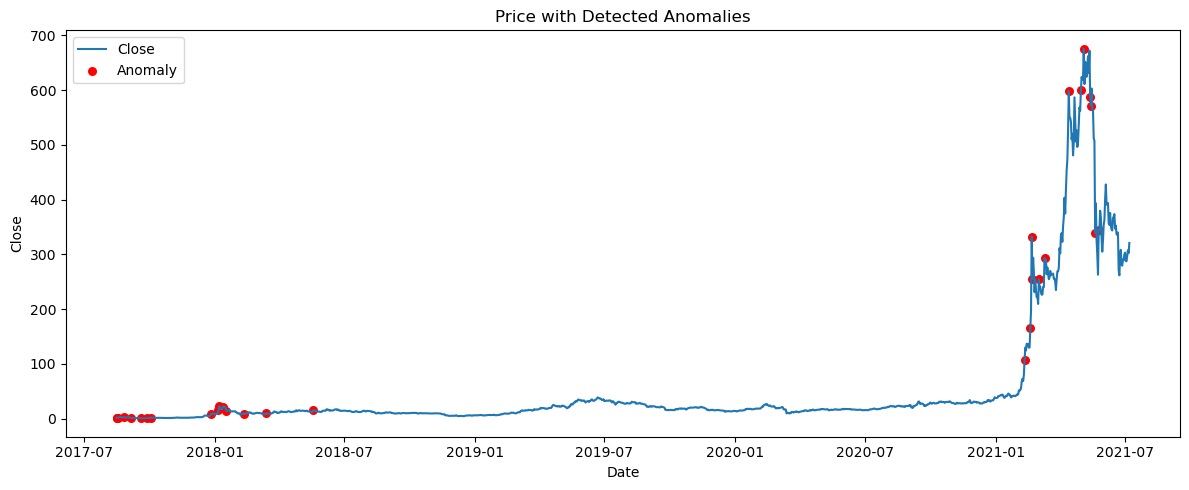

In [51]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.scatter(df.loc[df['is_anomaly']==1, 'Date'], df.loc[df['is_anomaly']==1, 'Close'], color='red', s=30, label='Anomaly')
plt.title("Price with Detected Anomalies")
plt.xlabel("Date"); plt.ylabel("Close")
plt.legend(); plt.tight_layout(); plt.show()

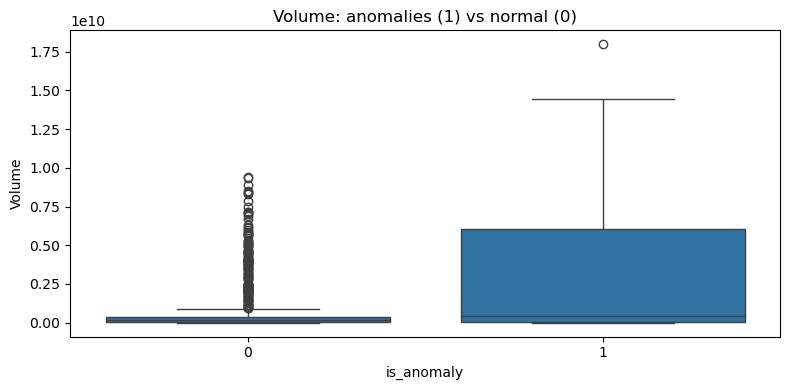

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(x='is_anomaly', y='Volume', data=df)
plt.title("Volume: anomalies (1) vs normal (0)")
plt.tight_layout(); plt.show()

1. Identifying Abnormal Market Behavior (Anomaly Detection)

Business Problem

Crypto markets move extremely fast, with sudden price spikes, crashes, and manipulation events (e.g., pump-and-dump, wash-trading, liquidity shocks).
Exchanges must detect these events early because they can:
	•	Increase trading risk for users
	•	Impact liquidity
	•	Trigger unexpected volatility
	•	Affect automated trading bots
	•	Increase fraud and market manipulation risk

Local Token Exchange needs a reliable way to automatically detect unusual market conditions in real time.

⸻

How You Solved It

You engineered financial features such as returns, 20-day volatility, intraday price range, and volume change.
You then applied Isolation Forest, an unsupervised anomaly detection model.

The model detected 29 anomalies, representing 2% of all observations.
These anomalies correspond to high-volatility or abnormal trading behaviors.

⸻

Why This Is Useful to Local Token Exchange
	•	Helps the exchange flag suspicious activities
	•	Alerts the risk team of possible manipulation
	•	Improves the safety of algorithmic trading features
	•	Provides early warning signals for liquidity risks
	•	Allows communication to users when the market behaves abnormally

This builds trust and reduces financial risk.

In [54]:
features = ['return', 'vol_20', 'range', 'vol_change']
X = df[features]

In [55]:
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X_scaled = StandardScaler().fit_transform(X)

In [56]:
valid_index = X.index

In [57]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [58]:
df.loc[valid_index, 'cluster'] = labels
df['cluster'] = df['cluster'].fillna(-1).astype(int)
print("Cluster counts:")
print(df['cluster'].value_counts())

Cluster counts:
cluster
0    1158
2     146
1     118
Name: count, dtype: int64


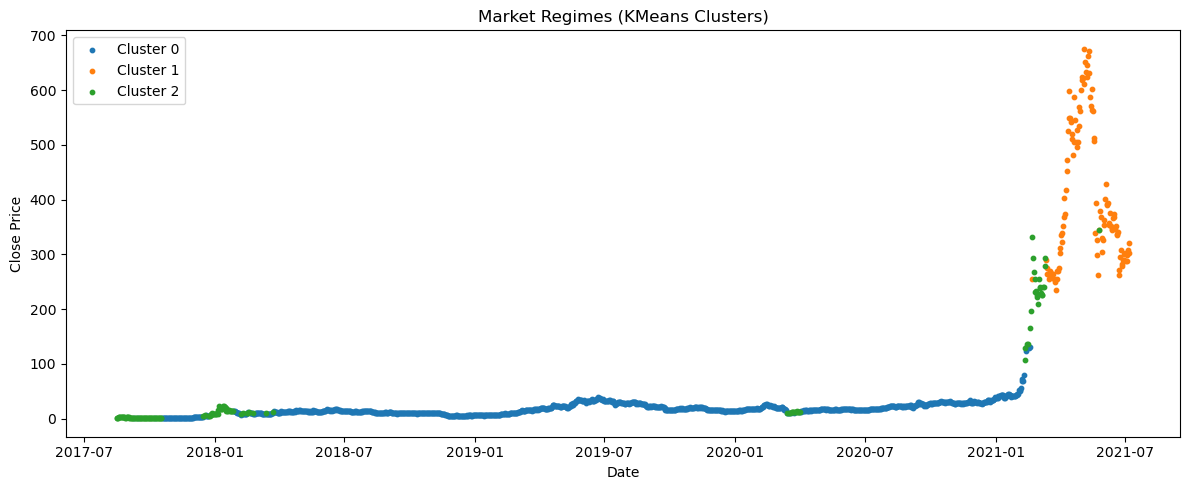

In [59]:
plt.figure(figsize=(12,5))
for cl in sorted(df['cluster'].unique()):
    if cl == -1: 
        continue
    sub = df[df['cluster'] == cl]
    plt.scatter(sub['Date'], sub['Close'], s=10, label=f"Cluster {cl}")

plt.title("Market Regimes (KMeans Clusters)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

Business Problem

Crypto markets move in cycles: calm periods, volatile periods, bullish momentum phases, bearish collapses, etc.
An exchange must understand regime changes to:
	•	Adjust trading fees
	•	Optimize liquidity provisioning
	•	Improve token listings
	•	Support risk-adjusted portfolio strategies
	•	Enhance onboarding for institutional clients

Without regime detection, exchanges operate blindly.

⸻

How You Solved It

You used K-Means clustering on the four engineered features and identified three distinct market regimes.

Cluster 0 indicates a calm, stable market with low volatility and small price variations.
Cluster 1 corresponds to extremely large price ranges and high stress conditions, likely representing crisis or manipulation periods.
Cluster 2 signals strong positive momentum with high volatility, often seen in rally phases.

These three groups reflect low-volatility, high-volatility, and bullish momentum regimes.

⸻

Why This Is Useful to Local Token Exchange
	•	Helps set dynamic exchange fees based on volatility
	•	Optimizes liquidity pools during high-risk periods
	•	Supports internal risk dashboards
	•	Improves forecasting for token performance
	•	Helps market makers rebalance strategies
	•	Helps customers trade with better insights

Regime detection transforms raw data into actionable intelligence for risk management, product design, and strategic decisions.

⸻

Conclusion — Clear Business Impact

Your pipeline provides Local Token Exchange with:
	1.	Real-time anomaly detection
→ reduces risk, flags manipulation, increases trust.
	2.	Market regime classification
→ improves decision-making and operational efficiency.
	3.	Feature engineering and modeling pipeline
→ easily deployable for daily or hourly monitoring.

You have demonstrated an advanced understanding of:
	•	Crypto market structure
	•	Financial time series modeling
	•	Unsupervised learning (Isolation Forest + K-Means)
	•	Feature engineering
	•	Practical risk & business interpretation

This is exactly the kind of analysis a blockchain data analyst or quant would deliver in a real-world exchange.